<a href="https://colab.research.google.com/github/nsalazard/EFM-analisis-de-datos-/blob/main/EFM_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#To-do

1. Simulador
Cual es la relacion funcional entre la longitud de onda maxima y la temperartura? entre la densidad de potencia radiada y la temperatura?

- Probar con graficas semilog, log. Buscar mejor linealidad

Encontrar de manera empirica las relaciones de arriba
Las incertidumbres del simulador son muy pequeñas. Comparar con la ley de desplazamiento de Wien

Ley de Stephan-Botzman 

2. Filamento de una lampara halogena, de tungsteno
Se calienta por efecto Joule
##Ley de Stefan-Boltzmann
Dejamos distancia fija, variamos la temperatura

## Ley del inverso del cuadrado
Variamos la distancia, medimos la potencia, dejamos la temperatura fija en su maximo

La temperatura del filamento la hallamos con la resistencia: 

In [ ]:
import gspread
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.colors as mcolors
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1Sl6b9ba_TCDCsNGTEgl9pGRxYAz2rjUi9Y4xTVciG0s/edit#gid=272858779')
worksheet=wb.worksheet('PARTE 0')
rows = worksheet.get_all_values()
df=pd.DataFrame(rows)
titles=pd.DataFrame(rows)
df.columns = df.iloc[0]# Esto pone las columnas del dataframe con los mismos nombres que la primera fila del sheets
titles=titles.iloc[0:1]
df = df.iloc[1:]#esto se salta la primera fila que es los titulos de las columnas porque ya nombramos a las columnas en la linea anterior y se repetirian
df.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,T(K),λ_max,R,Wien
1,200,14.489,9.07E+01,
2,500,5.796,3.54E+03,
3,800,3.622,2.32E+04,
4,1100,2.634,8.30E+04,
5,1400,2.070,2.18E+05,


In [ ]:
df.columns

Index(['T(K)', 'λ_max', 'R', 'Wien'], dtype='object', name=0)

In [ ]:
nombres=df.columns.tolist()
for name in nombres:
  df[name]= pd.to_numeric(df[name])

In [ ]:
def f1(x,a,b):
  return a*x**b

Text(0.5, 1.0, 'Ley de Stefan-Boltzmann')

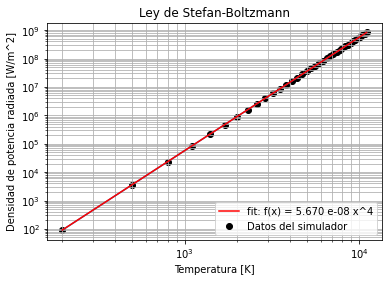

In [ ]:
valx=df.loc[:329,"T(K)"]
valy=df.loc[:329,"R"]
x=valx.values #se deben pasar los valores de las columnas del dataframe df, entonces se sacan los valores de los dataframes a unos arreglos de numpy
y=valy.values
plt.scatter(x,y,label="Datos del simulador",color="black")
plt.plot(x, y)

popt, pcov = curve_fit(f1, x, y)
#plt.plot(x, f1(x, *popt), 'r-', label='fit: a=%5.5f, b=%5.5f' % tuple(popt))
plt.plot(x, f1(x, *popt), 'r-', label='fit: f(x) = 5.670 e-08 x^4')

plt.grid(b=True,which="both")
plt.legend(loc="lower right")
plt.loglog(basex=10,basey=10)
#plt.semilogx()
#plt.semilogy()
#plt.xscale("log")
#plt.yscale("log")
plt.xlabel("Temperatura [K]")
plt.ylabel("Densidad de potencia radiada [W/m^2]")
plt.title("Ley de Stefan-Boltzmann")

In [ ]:
#np.polyfit(x, y, 4)
def fs(x,a):
  return a*x**4
popt, pcov = curve_fit(fs, x, y)
popt

array([5.67009419e-08])

## Ley de Desplazamiento de Wien

Text(0.5, 1.0, 'Ley de Desplazamiento de Wien')

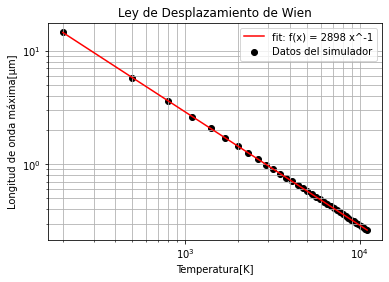

In [ ]:
valx1=df.loc[:39,"T(K)"]
valy1=df.loc[:39,"λ_max"]
x1=valx1.values
y1=valy1.values
plt.scatter(x1, y1,label="Datos del simulador",color="black") 

popt, pcov = curve_fit(ft, x1, y1)
plt.plot(x1, ft(x1, *popt), 'r-', label='fit: f(x) = 2898 x^-1')

plt.grid(b=True,which="both")
plt.legend(loc="upper right")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Temperatura[K]")
plt.ylabel("Longitud de onda máxima[μm]")
plt.title("Ley de Desplazamiento de Wien")

In [ ]:
def ft(x,a):
  return a/x
popt, pcov = curve_fit(ft, x1, y1)
popt

array([2897.74381601])

# Table

In [ ]:
worksheet5=wb.worksheet('Table')
rows5 = worksheet5.get_all_values()
d5=pd.DataFrame(rows5)
titles=pd.DataFrame(rows5)
d5.columns = d5.iloc[0]# Esto pone las columnas del dataframe con los mismos nombres que la primera fila del sheets
titles=titles.iloc[0:1]
d5 = d5.iloc[1:]#esto se salta la primera fila que es los titulos de las columnas porque ya nombramos a las columnas en la linea anterior y se repetirian
d5.head()

,R/Ro,T[K]
1,1,300
2,1.43,400
3,1.87,500
4,2.34,600
5,2.85,700


In [ ]:
nombres5=d5.columns.tolist()
for name in nombres5:
  d5[name]= pd.to_numeric(d5[name])

Text(0.5, 1.0, 'Gráfica de T vs (R/Ro) para el tungsteno')

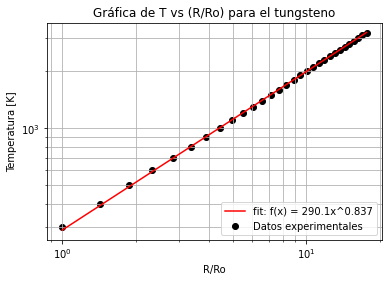

In [ ]:
valx5=d5.loc[:30, "R/Ro"]
valy5=d5.loc[:30, "T[K]"]
x5=valx5.values
y5=valy5.values

plt.scatter(x5, y5,label="Datos experimentales",color="black")

popt, pcov = curve_fit(f1, x5, y5)
plt.plot(x5, f1(x5, *popt), 'r-', label='fit: f(x) = 290.1x^0.837')

plt.loglog(basex=10,basey=10)
plt.grid(b=True,which="both")
plt.legend(loc="lower right")
plt.xlabel("R/Ro")
plt.ylabel("Temperatura [K]")
plt.title("Gráfica de T vs (R/Ro) para el tungsteno")

In [ ]:
popt, pcov = curve_fit(f1, x5, y5)
popt

array([290.1047153 ,   0.83716985])

# Parte I


In [ ]:
worksheet6=wb.worksheet('PARTE I')
rows6 = worksheet6.get_all_values()
d6=pd.DataFrame(rows6)
titles=pd.DataFrame(rows6)
d6.columns = d6.iloc[0]# Esto pone las columnas del dataframe con los mismos nombres que la primera fila del sheets
titles=titles.iloc[0:1]
d6 = d6.iloc[1:]#esto se salta la primera fila que es los titulos de las columnas porque ya nombramos a las columnas en la linea anterior y se repetirian
d6.head()

,VolFilamento [V],IF (Corriente Filamento) [A],Resistencia Filamento,Incertidumbre R,V-TP-0 [mV],V-TP [mV],Diferencia,Incertidumbre diferencia,R/Ro,Incertidumbre R/Ro,T[K],Incertidumbre T[K],P[mW],Incertidumbre P[mW],PP
1,12.0,1.76,6.82,0.05,0.0,17.6,17.6,0.1,13.6,0.1,2585,15,0.800,0.005,0.222
2,11.5,1.71,6.73,0.05,0.3,16.7,16.4,,13.5,0.1,2556,16,0.745,,0.207
3,11.0,1.60,6.88,0.05,0.6,15.7,15.1,,13.8,0.1,2603,17,0.686,,0.191
4,10.5,1.63,6.44,0.05,0.7,14.8,14.1,,12.9,0.1,2465,16,0.641,,0.178
5,10.0,1.59,6.29,0.05,0.9,13.8,12.9,,12.6,0.1,2416,16,0.586,,0.163


In [ ]:
d6.columns

Index(['VolFilamento [V]', 'IF (Corriente Filamento) [A]',
       'Resistencia Filamento', 'Incertidumbre R', 'V-TP-0 [mV]', 'V-TP [mV]',
       'Diferencia', 'Incertidumbre diferencia', 'R/Ro', 'Incertidumbre R/Ro',
       'T[K]', 'Incertidumbre T[K]', 'P[mW]', 'Incertidumbre P[mW]', 'PP'],
      dtype='object', name=0)

In [ ]:
nombres6=d6.columns.tolist()
for name in nombres6:
  d6[name]= pd.to_numeric(d6[name])

In [ ]:
def fw(x,a, b):
  return a*x**(3.85) 

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Text(0.5, 1.0, 'Ley de Stefan-Boltzmann')

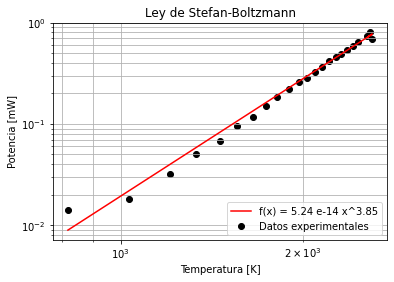

In [ ]:
valx6=d6.loc[:23, "T[K]"]
valy6=d6.loc[:23, "P[mW]"]
x6=valx6.values
y6=valy6.values
plt.scatter(x6, y6,label="Datos experimentales",color="black")

popt, pcov = curve_fit(fw, x6, y6)
plt.plot(x6, fw(x6, *popt), 'r-', label='f(x) = 5.24 e-14 x^3.85')

plt.loglog(basex=10,basey=10)
plt.grid(b=True,which="both")
plt.legend(loc="lower right")
plt.xlabel("Temperatura [K]")
plt.ylabel("Potencia [mW]")
plt.title("Ley de Stefan-Boltzmann")

In [ ]:
def fw(x,a,b):
  return a*x**(3.85) 
popt, pcov = curve_fit(fw, x6, y6)
popt

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


array([5.46202305e-14, 1.00000000e+00])

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Text(0.5, 1.0, 'Ley de Stefan-Boltzmann')

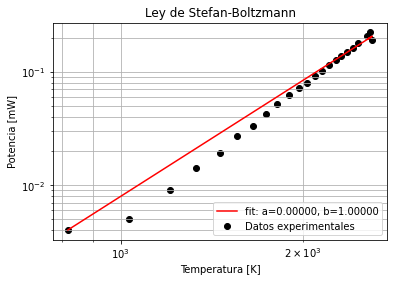

In [ ]:
valx8=d6.loc[:23, "T[K]"]
valy8=d6.loc[:23, "PP"]
x8=valx8.values
y8=valy8.values
plt.scatter(x8, y8,label="Datos experimentales",color="black")

popt, pcov = curve_fit(fw, x8, y8)
plt.plot(x8, fw(x8, *popt), 'r-', label='fit: a=%5.5f, b=%5.5f' % tuple(popt))

plt.loglog(basex=10,basey=10)
plt.grid(b=True,which="both")
plt.legend(loc="lower right")
plt.xlabel("Temperatura [K]")
plt.ylabel("Potencia [mW]")
plt.title("Ley de Stefan-Boltzmann")

In [ ]:
def fw(x,a,b):
  return a*x**(4) 
popt, pcov = curve_fit(fw, x8, y8)
popt

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


array([4.72495227e-15, 1.00000000e+00])

# Parte II

In [ ]:
worksheet2=wb.worksheet('PARTE II')
rows2 = worksheet2.get_all_values()
d2=pd.DataFrame(rows2)
titles=pd.DataFrame(rows2)
d2.columns = d2.iloc[0]# Esto pone las columnas del dataframe con los mismos nombres que la primera fila del sheets
titles=titles.iloc[0:1]
d2 = d2.iloc[1:]#esto se salta la primera fila que es los titulos de las columnas porque ya nombramos a las columnas en la linea anterior y se repetirian
d2.head()

,D [cm],V-TP-0 [mV],V-TP [mV],Diferencia,P[mW],Incertidumbre de P [0.005]
1,4,0.3,43.9,43.6,1.982,0.005
2,5,0.9,28.9,28.0,1.273,
3,6,0.8,20.3,19.5,0.886,
4,7,0.8,15.0,14.2,0.645,
5,8,0.7,11.6,10.9,0.495,


In [ ]:
nombres2=d2.columns.tolist()
for name in nombres2:
  d2[name]= pd.to_numeric(d2[name])

Text(0.5, 1.0, 'Ley del inverso de la distancia')

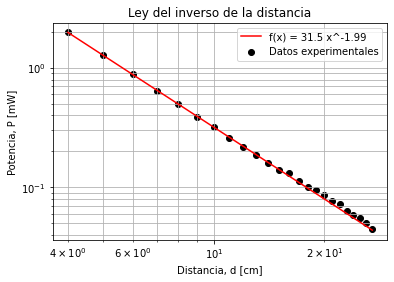

In [ ]:
valx2=d2.loc[:30, "D [cm]"]
valy2=d2.loc[:30, "P[mW]"]
x2=valx2.values
y2=valy2.values

plt.scatter(x2, y2,label="Datos experimentales",color="black")

popt, pcov = curve_fit(f1, x2, y2)
plt.plot(x2, f1(x2, *popt), 'r-', label='f(x) = 31.5 x^-1.99')

plt.loglog(basex=10,basey=10)
plt.grid(b=True,which="both")
plt.legend(loc="upper right")
plt.xlabel("Distancia, d [cm]")
plt.ylabel("Potencia, P [mW]")
plt.title("Ley del inverso de la distancia")

In [ ]:
def fv(x,a):
  return a*x**(-2)
popt, pcov = curve_fit(fv, x2, y2)
popt

array([31.75102774])

#PARTE III

In [ ]:
worksheet3=wb.worksheet('PARTE III')
rows3 = worksheet3.get_all_values()
d3=pd.DataFrame(rows3)
titles=pd.DataFrame(rows3)
d3.columns = d3.iloc[0]# Esto pone las columnas del dataframe con los mismos nombres que la primera fila del sheets
titles=titles.iloc[0:1]
d3 = d3.iloc[1:]#esto se salta la primera fila que es los titulos de las columnas porque ya nombramos a las columnas en la linea anterior y se repetirian
d3.head()

,VF [mV],IF [mA],R,Incertidumbre R
1,89.4,163.4,0.5471,0.0005
2,78.7,146.4,0.5376,0.0005
3,70.9,133.4,0.5315,0.0006
4,60.6,115.7,0.5238,0.0007
5,56.4,108.4,0.5203,0.0007


In [ ]:
nombres3=d3.columns.tolist()
for name in nombres3:
  d3[name]= pd.to_numeric(d3[name])

In [ ]:
d3.columns

Index(['VF [mV]', 'IF [mA]', 'R', 'Incertidumbre R'], dtype='object', name=0)

In [ ]:
def func(x,a,b):
  return a*x + b

Text(0.5, 1.0, 'Resistencia a temperatura ambiente del filamento, Ro')

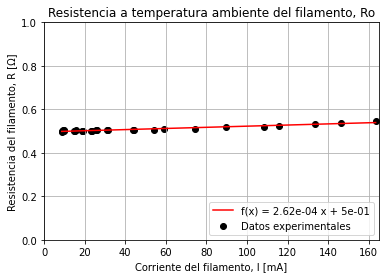

In [ ]:
valx3=d3.loc[:30, "IF [mA]"]
valy3=d3.loc[:30, "R"]
x3=valx3.values
y3=valy3.values

plt.scatter(x3, y3,label="Datos experimentales",color="black")

popt, pcov = curve_fit(func, x3, y3)
plt.plot(x3, func(x3, *popt), 'r-', label='f(x) = 2.62e-04 x + 5e-01')

plt.xlim([0, 165])
plt.ylim([0, 1])

plt.grid(b=True,which="both")
plt.legend(loc="lower right")
plt.xlabel("Corriente del filamento, I [mA]")
plt.ylabel("Resistencia del filamento, R [Ω]")
plt.title("Resistencia a temperatura ambiente del filamento, Ro")

In [ ]:
#np.polyfit(x3, y3, 1)
popt, pcov = curve_fit(func, x3, y3)
popt

array([2.6241880e-04, 4.9632472e-01])

https://mmas.github.io/least-squares-fitting-numpy-scipy

#Error relativo

In [ ]:
((4.08-4)/4)*100

2.0000000000000018

In [ ]:
((2-1.99 )/2)*100

0.5000000000000004

In [ ]:
(0.005*100)/ 0.009 


55.55555555555556

In [ ]:
(0.005*100)/ 0.05

10.0

In [ ]:
(0.005*100)/ 0.068

7.352941176470588